Epoch 1/200
3/3 - 0s - loss: 0.7114 - accuracy: 0.5165 - val_loss: 0.7214 - val_accuracy: 0.5492 - 369ms/epoch - 123ms/step
Epoch 2/200
3/3 - 0s - loss: 0.6948 - accuracy: 0.5604 - val_loss: 0.7052 - val_accuracy: 0.5792 - 19ms/epoch - 6ms/step
Epoch 3/200
3/3 - 0s - loss: 0.6791 - accuracy: 0.5714 - val_loss: 0.6893 - val_accuracy: 0.5956 - 19ms/epoch - 6ms/step
Epoch 4/200
3/3 - 0s - loss: 0.6636 - accuracy: 0.6264 - val_loss: 0.6745 - val_accuracy: 0.6175 - 18ms/epoch - 6ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6499 - accuracy: 0.6593 - val_loss: 0.6602 - val_accuracy: 0.6393 - 21ms/epoch - 7ms/step
Epoch 6/200
3/3 - 0s - loss: 0.6361 - accuracy: 0.6813 - val_loss: 0.6470 - val_accuracy: 0.6530 - 19ms/epoch - 6ms/step
Epoch 7/200
3/3 - 0s - loss: 0.6228 - accuracy: 0.6813 - val_loss: 0.6347 - val_accuracy: 0.6803 - 20ms/epoch - 7ms/step
Epoch 8/200
3/3 - 0s - loss: 0.6107 - accuracy: 0.6923 - val_loss: 0.6231 - val_accuracy: 0.6885 - 18ms/epoch - 6ms/step
Epoch 9/200
3/3 - 0s - loss: 

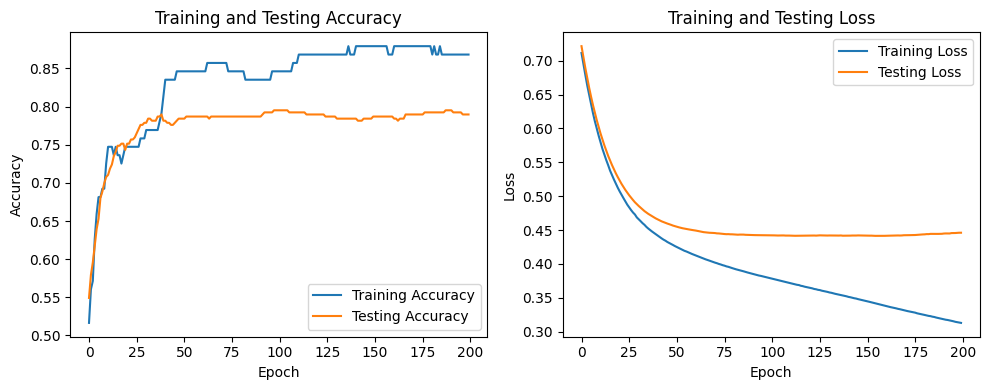

12/12 [==============================] - 0s 643us/step - loss: 0.4461 - accuracy: 0.7896
Loss: 0.4461, Accuracy: 78.96%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics as sk_metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
f2 = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
X = data[f2]
X = X[(X[feature_cols] != 0).all(axis=1)]
y = X.Outcome
X = X.drop(columns=['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Normalização dos recursos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie um modelo de regressão logística simples com TensorFlow e Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo
history = model.fit(X_train, y_train, epochs=200, verbose=2, validation_data=(X_test, y_test))

# Plot training and testing accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

# Plot training and testing loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Avalie o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

tf.keras.utils.plot_model(model, "my_first_model.png")